# Plotting phase differences (circular plots)

---

We start by importing the necessary packages:

In [33]:
from thebeat import Sequence
from thebeat.visualization import plot_phase_differences
from thebeat.stats import get_phase_differences
import numpy as np
import pandas as pd
import os #TODO remove

In [34]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', message='Matplotlib ')

## Example 1: Compare random data with isochronous sequence

---

First we take a look at what the behind-the-scenes data looks like, the phase differences themselves, here represented as degrees.

In [35]:
# We create a random number generator with a seed so you get the same output as we.
rng = np.random.default_rng(seed=123)

# Create a random test sequence
test = Sequence.generate_random_normal(n_events=10, mu=500, sigma=50, rng=rng)

# Create an isochronous reference sequence
ref = Sequence.generate_isochronous(n_events=10, ioi=500)

# Get and print the phase differences
phase_diffs = get_phase_differences(test, ref, unit="degrees")
print(phase_diffs)

[         nan          nan 311.15131193 357.51662134   4.49970043
  37.62801282  58.4037493   35.49105803  55.00133797  43.60390173]


---

So what does it look like in a circular histogram?

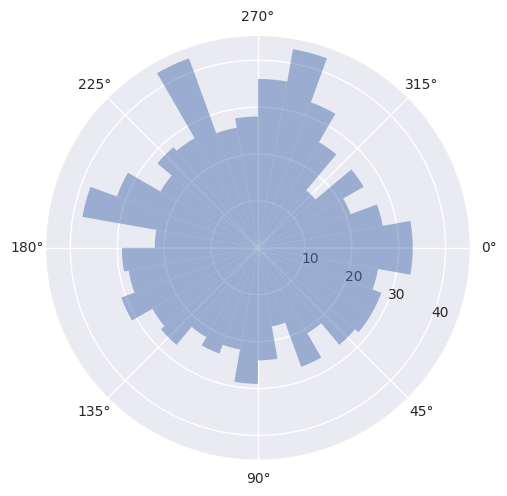

In [36]:
test_seq = Sequence.generate_random_normal(n_events=1000, mu=500, sigma=50, rng=rng)
ref_seq = Sequence.generate_isochronous(n_events=1000, ioi=500)

plot_phase_differences(test_sequence=test_seq, reference_sequence=ref_seq);

## Example 2: Finger-tapping data

---

In [37]:
# Load the dataset
print(os.getcwd())
# Change the path to the location of the dataset on your computer
df = pd.read_csv('docs/source/examples/snippets/sampjit_sampledata.csv')

# Take a quick look at the data
print(df.head(5))

/Users/jellevanderwerff/thebeat
  sequence_id  pp_id  condition  length  tempo  variance  interval_i  \
0        1_13      1  jittering      25    400       0.2           4   
1        1_13      1  jittering      25    400       0.2           5   
2        1_13      1  jittering      25    400       0.2           6   
3        1_13      1  jittering      25    400       0.2           7   
4        1_13      1  jittering      25    400       0.2           8   

     stim_ioi  resp_iti  
0  488.360885    329.32  
1  302.385354    384.55  
2  378.198490    497.05  
3  448.052241    400.91  
4  418.512601    378.41  


---

In [38]:
stimuli = []
responses = []

# We loop over the sequence id's
for seq_id in df.sequence_id.unique():
    # We get the relevant piece of the dataframe for that sequence id
    df_piece = df.loc[df['sequence_id'] == seq_id]

    # We create a Sequence object for the stimulus and the response
    stimulus = Sequence(iois=df_piece.stim_ioi)
    response = Sequence(iois=df_piece.resp_iti)

    # Add them to the lists
    stimuli.append(stimulus)
    responses.append(response)


Now we're ready to plot. 

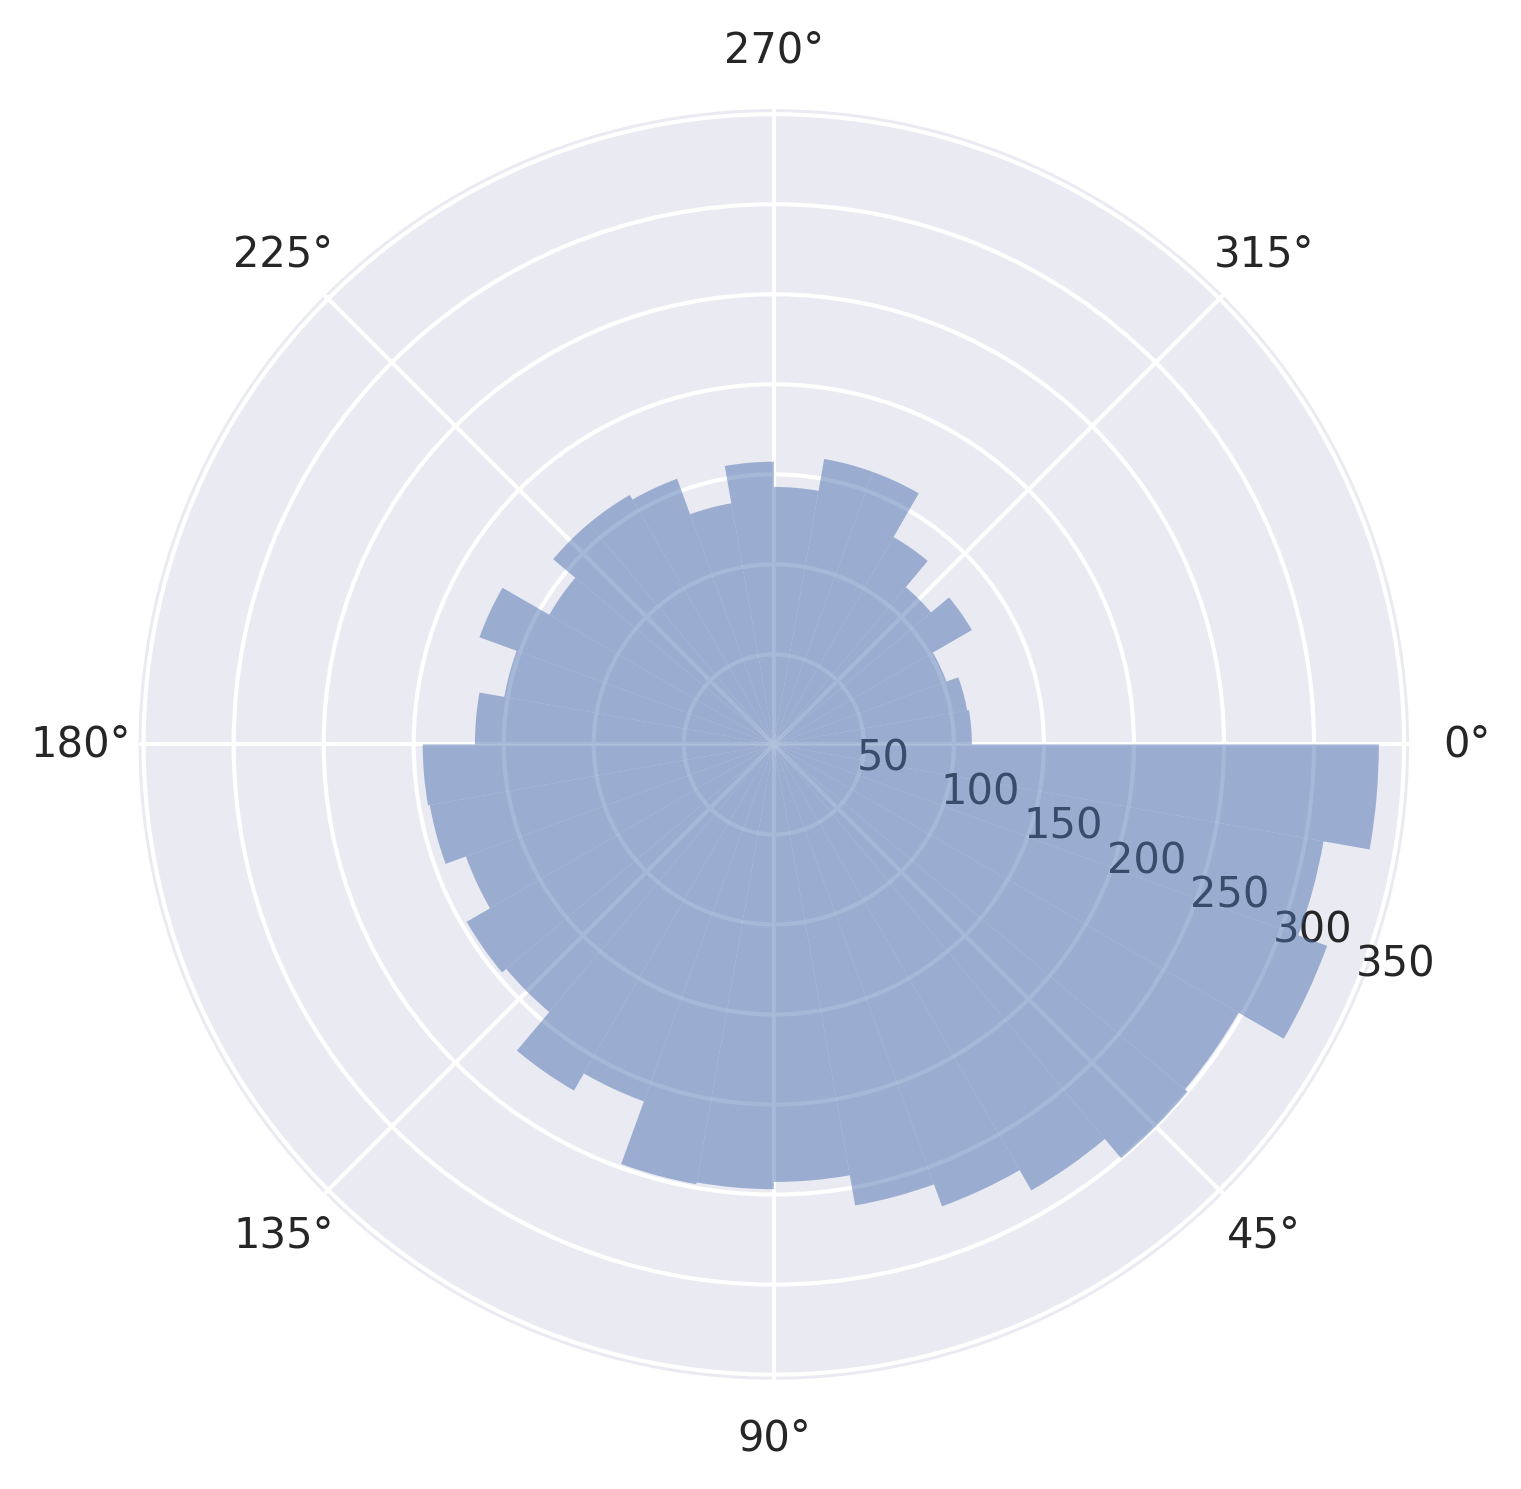

In [39]:
plot_phase_differences(stimuli, responses, dpi=300);

Say we want to change the x axis labels, we can do that as follows:

## Adjusting and saving the figure